In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from tqdm import tqdm
from scipy.interpolate import UnivariateSpline
from numpy.polynomial import chebyshev
from scipy import optimize
from math import pi

import sys
sys.path.append('../')

In [2]:
import pv_utils

In [3]:
import importlib

In [4]:
importlib.reload(pv_utils)

<module 'pv_utils' from '/home/gridsan/tmackey/cdvae/scripts/XRD_CDVAE/data_utils/pv_utils.py'>

In [5]:
y_data = np.random.normal(0, 1, 8500) + 10*np.exp(-(np.linspace(0, 4*np.pi, 8500))/10) + 10*np.exp(-(np.linspace(0, 8500, 8500) - 4000)**2/10000) + 10*np.exp(-(np.linspace(0, 8500, 8500) - 1000)**2/10000) + + 10*np.exp(-(np.linspace(0, 8500, 8500) - 7000)**2/10000)

In [6]:
y_data.size

8500

In [7]:
import unknown_utils
importlib.reload(unknown_utils)

<module 'unknown_utils' from '/home/gridsan/tmackey/cdvae/scripts/XRD_CDVAE/data_utils/unknown_utils.py'>

In [8]:
dir = "/home/gridsan/tmackey/cdvae/scripts/XRD_CDVAE/PDF_large_scale/filtered_raw"

In [9]:
dictionary_of_cifs = unknown_utils.stoichioemtry_extraction(dir)

pv_xrd_dict_90.pt
Li5_Ti2_O6_F_raw.xy
['Li', '5', 'Ti', '2', 'O', '6', 'F']
Pr_Eu2_V3_O12_raw.xy
['Pr', 'Eu', '2', 'V', '3', 'O', '12']
Cs_Fe2_Se2_raw.xy
['Cs', 'Fe', '2', 'Se', '2']
Zn3_Mg4_Al2_Ti3_O16_raw.xy
Ca_Co_O_S_raw.xy
['Ca', 'Co', 'O', 'S']
Na2_O_Fe2_S2_raw.xy
['Na', '2', 'O', 'Fe', '2', 'S', '2']
Lu4_Y_Sn2_Nb_O14_raw.xy
['Lu', '4', 'Y', 'Sn', '2', 'Nb', 'O', '14']
Pr2_Gd_V3_O12_raw.xy
['Pr', '2', 'Gd', 'V', '3', 'O', '12']
La2_Sr_Ni4_As4_O2_raw.xy
['La', '2', 'Sr', 'Ni', '4', 'As', '4', 'O', '2']
pv_xrd_dict_88.pt
Gd7_Yb4_Si_P3_O26_raw.xy
Li2_Y_Ho_Ge2_O8_raw.xy
['Li', '2', 'Y', 'Ho', 'Ge', '2', 'O', '8']
Y2_Ge_Mo_O8_raw.xy
['Y', '2', 'Ge', 'Mo', 'O', '8']
Li2_Mg3_Ga4_Ti3_O16_raw.xy
Sm_Eu3_V4_O16_raw.xy
Cu2_Tb_Fe_Al2_raw.xy
['Cu', '2', 'Tb', 'Fe', 'Al', '2']
pv_xrd_dict_7.pt
Sm2_Nd_V3_O12_raw.xy
['Sm', '2', 'Nd', 'V', '3', 'O', '12']
pv_xrd_dict_34.pt
pv_xrd_dict_51.pt
Sr5_Ce_Ti3_Nb7_O30_raw.xy
Sr6_Ti2_Nb_Ta7_O30_raw.xy
Sm_Y3_V4_O16_raw.xy
Co13_Gd2_Ni4_raw.xy
['Co', '13', 'Gd'

In [10]:
index = 2
keyvalue = list(dictionary_of_cifs.keys())[index]
print(keyvalue)
print(dictionary_of_cifs[keyvalue][0])

Cs_Fe2_Se2_raw.xy
# generated using pymatgen
data_Cs(FeSe)2
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.31756564
_cell_length_b   3.31756564
_cell_length_c   3.31756564
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Cs(FeSe)2
_chemical_formula_sum   'Cs1 Fe2 Se2'
_cell_volume   36.51392955
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Cs  Cs0  1  0.95475677  0.72270081  0.83031364  1
  Fe  Fe1  1  0.82687565  0.31516974  0.35362057  1
  Fe  Fe2  1  0.54335851  0.01033914  0.64134993  1
  Se  Se3  1  0.10085919  0.73127179  0.76158873  1
  Se  Se4  1  0.70876418  0.33055792  0.17298068  1



In [11]:
df = unknown_utils.create_dataframe(dictionary_of_cifs)

/home/gridsan/tmackey/.conda/envs/cdvae/lib/python3.8/site-packages/pymatgen/io/cif.py:1168: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [52]:
df

,cif,filename,material_id,formation_energy_per_atom,spacegroup.number,xrd_peak_intensities,xrd_peak_locations,disc_sim_xrd,atomic_numbers
0,# generated using pymatgen\ndata_Li5Ti2O6F\n_s...,Li5_Ti2_O6_F_raw.xy,Li5_Ti2_O6_F_raw_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 22, 22, 8, 8, 8, 8, 8, 8, 9]"
0,# generated using pymatgen\ndata_PrEu2V3O12\n_...,Pr_Eu2_V3_O12_raw.xy,Pr_Eu2_V3_O12_raw_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[59, 63, 63, 23, 23, 23, 8, 8, 8, 8, 8, 8, 8, ..."
0,# generated using pymatgen\ndata_Cs(FeSe)2\n_s...,Cs_Fe2_Se2_raw.xy,Cs_Fe2_Se2_raw_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[55, 26, 26, 34, 34]"
0,# generated using pymatgen\ndata_CaCoSO\n_symm...,Ca_Co_O_S_raw.xy,Ca_Co_O_S_raw_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[20, 27, 16, 8]"
0,# generated using pymatgen\ndata_Na2Fe2S2O\n_s...,Na2_O_Fe2_S2_raw.xy,Na2_O_Fe2_S2_raw_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[11, 11, 26, 26, 16, 16, 8]"
...,...,...,...,...,...,...,...,...,...
0,# generated using pymatgen\ndata_Li2Mg2Ti4CoO1...,Li2_Mg2_Co_Ti4_O12_raw.xy,Li2_Mg2_Co_Ti4_O12_raw_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 3, 12, 12, 22, 22, 22, 22, 27, 8, 8, 8, 8,..."
0,# generated using pymatgen\ndata_BaCaBO3F\n_sy...,Ba_Ca_B_O3_F_raw.xy,Ba_Ca_B_O3_F_raw_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[56, 20, 5, 8, 8, 8, 9]"
0,# generated using pymatgen\ndata_MgNb4NiO12\n_...,Mg_Ni_Nb4_O12_raw.xy,Mg_Ni_Nb4_O12_raw_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12, 41, 41, 41, 41, 28, 8, 8, 8, 8, 8, 8, 8, ..."
0,# generated using pymatgen\ndata_Mg2Nb2Co2O9\n...,Co2_Mg2_Nb2_O9_raw.xy,Co2_Mg2_Nb2_O9_raw_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12, 12, 41, 41, 27, 27, 8, 8, 8, 8, 8, 8, 8, ..."


In [15]:
importlib.reload(unknown_utils)
importlib.reload(pv_utils)

<module 'pv_utils' from '/home/gridsan/tmackey/cdvae/scripts/XRD_CDVAE/data_utils/pv_utils.py'>

In [16]:
xrd_adjusted = torch.load("/home/gridsan/tmackey/cdvae/scripts/XRD_CDVAE/PDF_large_scale/filtered_raw/pv_xrd_dict_0.pt")

In [30]:
csv_data = pd.read_csv("/home/gridsan/tmackey/cdvae/data/PDF_filtered_raw/test.csv")

In [53]:
pv_xrd_for_testing = unknown_utils.create_xrd_for_testing(xrd_adjusted, csv_data)

Li5_Ti2_O6_F_raw.xy
Pr_Eu2_V3_O12_raw.xy
Cs_Fe2_Se2_raw.xy
Ca_Co_O_S_raw.xy
Na2_O_Fe2_S2_raw.xy
Lu4_Y_Sn2_Nb_O14_raw.xy
Pr2_Gd_V3_O12_raw.xy
La2_Sr_Ni4_As4_O2_raw.xy
Li2_Y_Ho_Ge2_O8_raw.xy
Y2_Ge_Mo_O8_raw.xy
Cu2_Tb_Fe_Al2_raw.xy
Sm2_Nd_V3_O12_raw.xy
Co13_Gd2_Ni4_raw.xy
Li2_La_Pr_Ge2_O8_raw.xy
Eu_Yb_V2_O8_raw.xy
Li_Sb_O3_raw.xy
La_Eu_V2_O8_raw.xy
Na3_Ho_B2_O6_raw.xy
Cs_Li_Fe_S2_raw.xy
Nd_Sr2_Mn2_O7_raw.xy
Li_Ga4_Al_O8_raw.xy
Sm_Gd2_V3_O12_raw.xy
Na_Lu_Mo2_O8_raw.xy
Cd2_Zn_Te_O6_raw.xy
Nd_B_Mo_O6_raw.xy
Li_Al_P2_O7_raw.xy
Mg_Fe2_O4_raw.xy
Ni_Zn_Ta4_O12_raw.xy
K_Zn_P_O4_raw.xy
Li2_Yb_Ho_Ge2_O8_raw.xy
Bi_La_Fe_Mn_O6_raw.xy
Pb2_Co_Mo_O6_raw.xy
Mg3_Ga2_Ti_O8_raw.xy
Ce_Eu_V2_O8_raw.xy
Nd_B_W_O6_raw.xy
Sr2_Sn_Ti_O6_raw.xy
Sm_Cu_Mn6_O12_raw.xy
Pb2_O_Cl2_raw.xy
Pb2_Fe_Mo_O6_raw.xy
Co_Mg_Nb4_O12_raw.xy
La3_Ni4_As4_O2_raw.xy
Mg_Zn_P2_O7_raw.xy
Ca_Gd_Sb_W_O8_raw.xy
Li_V2_O4_raw.xy
Ba2_Al_Sb_O6_raw.xy
In_Fe_Te_O6_raw.xy
Pb_Sr_Sc_Nb_O6_raw.xy
Sr2_Mn_W_O6_raw.xy
La_Y2_V3_O12_raw.xy
Sr_Ba_Fe_W_O6_raw.x

In [60]:
list(pv_xrd_for_testing.keys())

['Li5_Ti2_O6_F_raw.xy',
 'Pr_Eu2_V3_O12_raw.xy',
 'Cs_Fe2_Se2_raw.xy',
 'Ca_Co_O_S_raw.xy',
 'Na2_O_Fe2_S2_raw.xy',
 'Lu4_Y_Sn2_Nb_O14_raw.xy',
 'Pr2_Gd_V3_O12_raw.xy',
 'La2_Sr_Ni4_As4_O2_raw.xy',
 'Li2_Y_Ho_Ge2_O8_raw.xy',
 'Y2_Ge_Mo_O8_raw.xy',
 'Cu2_Tb_Fe_Al2_raw.xy',
 'Sm2_Nd_V3_O12_raw.xy',
 'Co13_Gd2_Ni4_raw.xy',
 'Li2_La_Pr_Ge2_O8_raw.xy',
 'Eu_Yb_V2_O8_raw.xy',
 'Li_Sb_O3_raw.xy',
 'La_Eu_V2_O8_raw.xy',
 'Na3_Ho_B2_O6_raw.xy',
 'Cs_Li_Fe_S2_raw.xy',
 'Nd_Sr2_Mn2_O7_raw.xy',
 'Li_Ga4_Al_O8_raw.xy',
 'Sm_Gd2_V3_O12_raw.xy',
 'Na_Lu_Mo2_O8_raw.xy',
 'Cd2_Zn_Te_O6_raw.xy',
 'Nd_B_Mo_O6_raw.xy',
 'Li_Al_P2_O7_raw.xy',
 'Mg_Fe2_O4_raw.xy',
 'Ni_Zn_Ta4_O12_raw.xy',
 'K_Zn_P_O4_raw.xy',
 'Li2_Yb_Ho_Ge2_O8_raw.xy',
 'Bi_La_Fe_Mn_O6_raw.xy',
 'Pb2_Co_Mo_O6_raw.xy',
 'Mg3_Ga2_Ti_O8_raw.xy',
 'Ce_Eu_V2_O8_raw.xy',
 'Nd_B_W_O6_raw.xy',
 'Sr2_Sn_Ti_O6_raw.xy',
 'Sm_Cu_Mn6_O12_raw.xy',
 'Pb2_O_Cl2_raw.xy',
 'Pb2_Fe_Mo_O6_raw.xy',
 'Co_Mg_Nb4_O12_raw.xy',
 'La3_Ni4_As4_O2_raw.xy',
 'Mg_Zn_P2_

In [61]:
#requested_compounds
requested_compounds = ["Cl4_N2_O4_Pd2_Rb2",
"Co_Mg_Nb4_O12",
"Co13_Gd2_Ni4",
"Eu2_Sm_V3_O12",
"Li2_Ti_O3",
"Nd_Sr2_Mn2_O7",
"Ni_Zn_Ta4_O12",
"Sr_Cr_Fe_As2"]

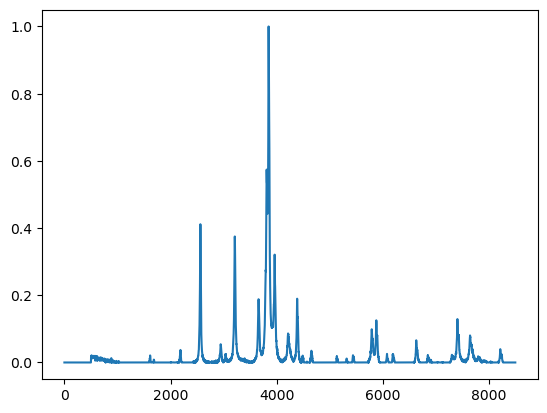

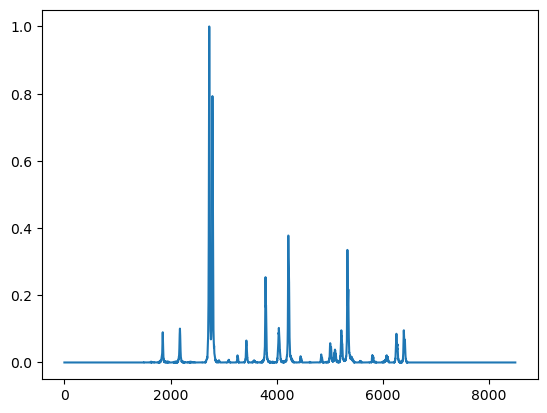

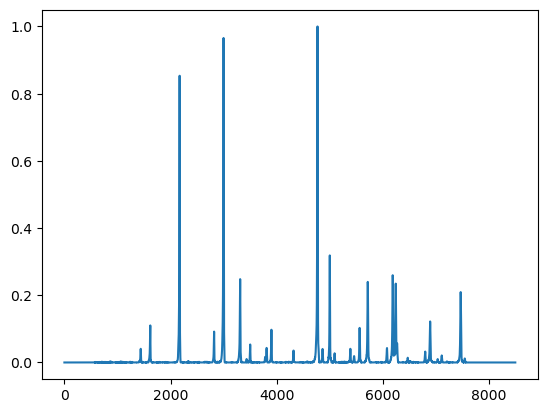

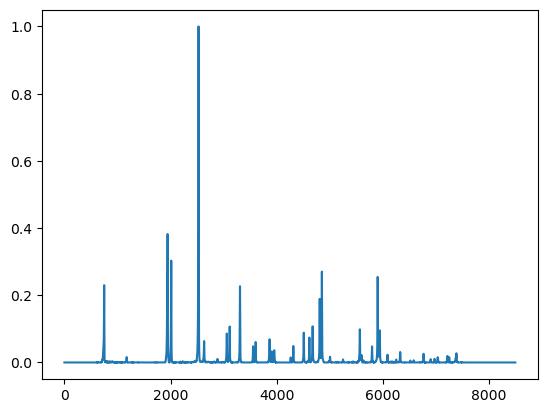

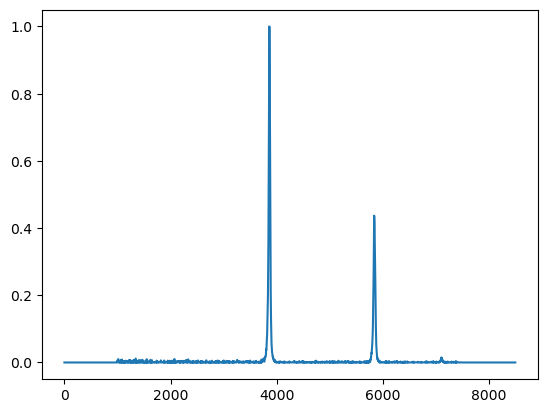

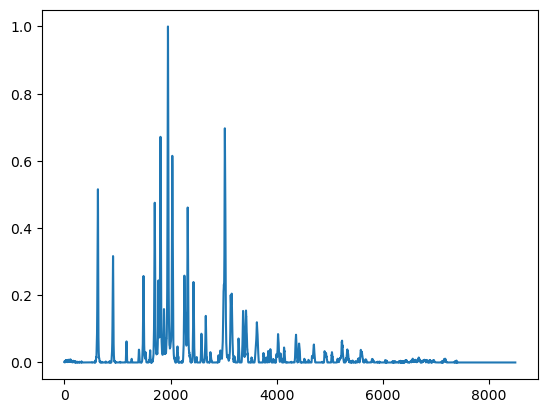

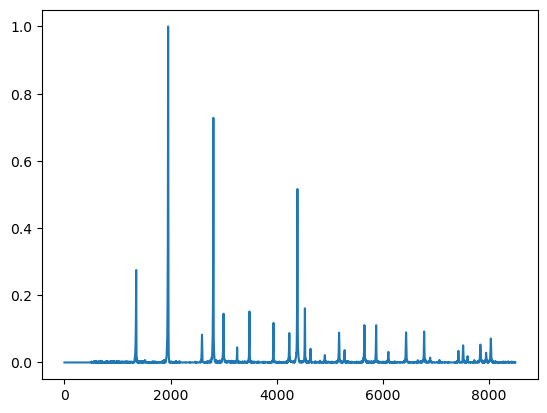

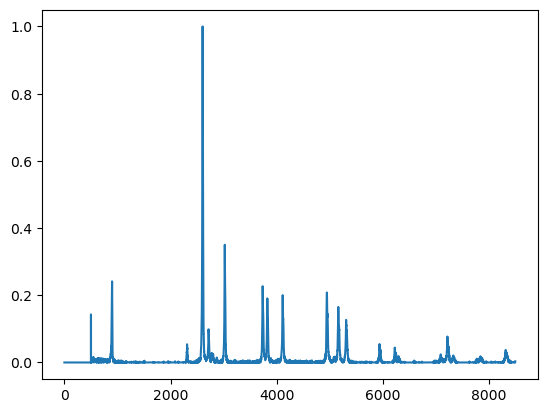

In [68]:
for i in range(len(list(pv_xrd_for_testing.keys()))):
    for compound in requested_compounds: 
        if compound in list(pv_xrd_for_testing.keys())[i]:
            plt.plot(pv_xrd_for_testing[list(pv_xrd_for_testing.keys())[i]][0].numpy())
            plt.show()
            print("\n")

In [40]:
counter = 0
for i in range(0, len(csv_data['filename'])):
    for compound in requested_compounds: 
        if compound in csv_data['filename'][i]:
            counter += 1
            print(csv_data['material_id'][i])   

Co13_Gd2_Ni4_raw.xy
Nd_Sr2_Mn2_O7_raw.xy
Ni_Zn_Ta4_O12_raw.xy
Co_Mg_Nb4_O12_raw.xy
Li2_Ti_O3_raw.xy
Cl4_N2_O4_Pd2_Rb2_raw.xy
Eu2_Sm_V3_O12_raw.xy
Sr_Cr_Fe_As2_raw.xy


In [49]:
final_directory = "/home/gridsan/tmackey/cdvae/data/PDF_filtered_raw_newly_subtracted"

In [69]:
#save pv_xrds to /home/gridsan/tmackey/cdvae/data/Freedman_lab_full_subtraction as test_pv_xrd.pt
torch.save(pv_xrd_for_testing, os.path.join(final_directory, "test_pv_xrd.pt"))

#save df to /home/gridsan/tmackey/cdvae/data/Freedman_lab_full_subtraction as test.csv
csv_data.to_csv(os.path.join(final_directory, "test.csv"))

In [51]:
unknown_utils.generate_and_save_graphs(final_directory)

  0%|          | 2/445 [00:00<00:35, 12.48it/s]/home/gridsan/tmackey/.conda/envs/cdvae/lib/python3.8/site-packages/pymatgen/io/cif.py:1168: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
100%|██████████| 445/445 [00:20<00:00, 21.91it/s]
